<a href="https://colab.research.google.com/github/EvgeniaKantor/DI-Bootcamp_ML/blob/main/dchW7D1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Load and Clean Text Data

In [ ]:
import requests
import re
import nltk
import spacy

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
def load_texts(urls):
    corpus = []
    for url in urls:
        response = requests.get(url)
        text = response.text

        # Remove non-text parts
        start_idx = text.find('START')
        end_idx = text.find('*** END')
        if start_idx != -1 and end_idx != -1:
            text = text[start_idx:end_idx]

        # Clean non-words (remove special characters)
        text = re.sub(r'[^A-Za-z\s]', '', text)
        corpus.append(text.strip())

    return corpus

# URLs to the books
urls = [
    "https://www.gutenberg.org/cache/epub/11/pg11.txt",  # Alice’s Adventures in Wonderland
    "https://www.gutenberg.org/cache/epub/12/pg12.txt",  # THROUGH THE LOOKING-GLASS
    "https://www.gutenberg.org/cache/epub/29042/pg29042.txt"  # A Tangled Tale
]

# Load the books
books = load_texts(urls)

# Print first 200 characters of each
for i, book in enumerate(books):
    print(f"Book {i+1} first 200 chars:\n{book[:200]}\n")

Book 1 first 200 chars:
START OF THE PROJECT GUTENBERG EBOOK ALICES ADVENTURES IN WONDERLAND 
Illustration




Alices Adventures in Wonderland

by Lewis Carroll

THE MILLENNIUM FULCRUM EDITION 

Contents

 CHAP

Book 2 first 200 chars:
START OF THE PROJECT GUTENBERG EBOOK THROUGH THE LOOKINGGLASS 
Illustration




THROUGH THE LOOKINGGLASS

And What Alice Found There

By Lewis Carroll

The Millennium Fulcrum Edition 



Book 3 first 200 chars:
START OF THE PROJECT GUTENBERG EBOOK A TANGLED TALE 




Produced by Chris Curnow Carla Foust Lindy Walsh and the
Online Distributed Proofreading Team at httpswwwpgdpnet
Music transcribed by Li



# 2. Tokenize the Text

tokenize the text and print the first 150 tokens of each book

In [ ]:
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt_tab') # Download the necessary data

# Tokenize each book
tokenized_books = [word_tokenize(book) for book in books]

# Print first 150 tokens of each book
for i, tokens in enumerate(tokenized_books):
    print(f"Book {i+1} first 150 tokens:\n{tokens[:150]}\n")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Book 1 first 150 tokens:
['START', 'OF', 'THE', 'PROJECT', 'GUTENBERG', 'EBOOK', 'ALICES', 'ADVENTURES', 'IN', 'WONDERLAND', 'Illustration', 'Alices', 'Adventures', 'in', 'Wonderland', 'by', 'Lewis', 'Carroll', 'THE', 'MILLENNIUM', 'FULCRUM', 'EDITION', 'Contents', 'CHAPTER', 'I', 'Down', 'the', 'RabbitHole', 'CHAPTER', 'II', 'The', 'Pool', 'of', 'Tears', 'CHAPTER', 'III', 'A', 'CaucusRace', 'and', 'a', 'Long', 'Tale', 'CHAPTER', 'IV', 'The', 'Rabbit', 'Sends', 'in', 'a', 'Little', 'Bill', 'CHAPTER', 'V', 'Advice', 'from', 'a', 'Caterpillar', 'CHAPTER', 'VI', 'Pig', 'and', 'Pepper', 'CHAPTER', 'VII', 'A', 'Mad', 'TeaParty', 'CHAPTER', 'VIII', 'The', 'Queens', 'CroquetGround', 'CHAPTER', 'IX', 'The', 'Mock', 'Turtles', 'Story', 'CHAPTER', 'X', 'The', 'Lobster', 'Quadrille', 'CHAPTER', 'XI', 'Who', 'Stole', 'the', 'Tarts', 'CHAPTER', 'XII', 'Alices', 'Evidence', 'CHAPTER', 'I', 'Down', 'the', 'RabbitHole', 'Alice', 'was', 'beginning', 'to', 'get', 'very', 'tired', 'of', 'sitting', 'by', 

# 3. Remove Stopwords

remove stopwords using NLTK. Check that they were removed using count() and looking for some of the stop words like: ‘i’, ‘me’, ‘my’, ‘myself’, ‘we’, ‘our’, ‘ours’, ‘ourselves’, etc.

In [ ]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

# Remove stopwords
tokenized_books_no_stopwords = [[word for word in tokens if word.lower() not in stop_words] for tokens in tokenized_books]

# Check removal
for i, tokens in enumerate(tokenized_books_no_stopwords):
    print(f"Book {i+1} first 150 tokens after stopword removal:\n{tokens[:150]}\n")

# Check if specific stopwords are removed
for word in ["i", "me", "my", "myself", "we", "our"]:
    print(f"Word '{word}' count in Book 1:", tokenized_books_no_stopwords[0].count(word))


Book 1 first 150 tokens after stopword removal:
['START', 'PROJECT', 'GUTENBERG', 'EBOOK', 'ALICES', 'ADVENTURES', 'WONDERLAND', 'Illustration', 'Alices', 'Adventures', 'Wonderland', 'Lewis', 'Carroll', 'MILLENNIUM', 'FULCRUM', 'EDITION', 'Contents', 'CHAPTER', 'RabbitHole', 'CHAPTER', 'II', 'Pool', 'Tears', 'CHAPTER', 'III', 'CaucusRace', 'Long', 'Tale', 'CHAPTER', 'IV', 'Rabbit', 'Sends', 'Little', 'Bill', 'CHAPTER', 'V', 'Advice', 'Caterpillar', 'CHAPTER', 'VI', 'Pig', 'Pepper', 'CHAPTER', 'VII', 'Mad', 'TeaParty', 'CHAPTER', 'VIII', 'Queens', 'CroquetGround', 'CHAPTER', 'IX', 'Mock', 'Turtles', 'Story', 'CHAPTER', 'X', 'Lobster', 'Quadrille', 'CHAPTER', 'XI', 'Stole', 'Tarts', 'CHAPTER', 'XII', 'Alices', 'Evidence', 'CHAPTER', 'RabbitHole', 'Alice', 'beginning', 'get', 'tired', 'sitting', 'sister', 'bank', 'nothing', 'twice', 'peeped', 'book', 'sister', 'reading', 'pictures', 'conversations', 'use', 'book', 'thought', 'Alice', 'without', 'pictures', 'conversations', 'considering', 

# 4. Apply Stemming (PorterStemmer)

Using PorterStemmer(), print the first 50 stemmed tokens

In [ ]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

# Stem words
stemmed_books = [[stemmer.stem(word) for word in tokens] for tokens in tokenized_books_no_stopwords]

# Print first 50 stemmed tokens
for i, tokens in enumerate(stemmed_books):
    print(f"Book {i+1} first 50 tokens after stemming:\n{tokens[:50]}\n")

Book 1 first 50 tokens after stemming:
['start', 'project', 'gutenberg', 'ebook', 'alic', 'adventur', 'wonderland', 'illustr', 'alic', 'adventur', 'wonderland', 'lewi', 'carrol', 'millennium', 'fulcrum', 'edit', 'content', 'chapter', 'rabbithol', 'chapter', 'ii', 'pool', 'tear', 'chapter', 'iii', 'caucusrac', 'long', 'tale', 'chapter', 'iv', 'rabbit', 'send', 'littl', 'bill', 'chapter', 'v', 'advic', 'caterpillar', 'chapter', 'vi', 'pig', 'pepper', 'chapter', 'vii', 'mad', 'teaparti', 'chapter', 'viii', 'queen', 'croquetground']

Book 2 first 50 tokens after stemming:
['start', 'project', 'gutenberg', 'ebook', 'lookingglass', 'illustr', 'lookingglass', 'alic', 'found', 'lewi', 'carrol', 'millennium', 'fulcrum', 'edit', 'dramati', 'person', 'arrang', 'commenc', 'game', 'white', 'red', 'piec', 'pawn', 'pawn', 'piec', 'tweedlede', 'daisi', 'daisi', 'humpti', 'dumpti', 'unicorn', 'haigha', 'messeng', 'carpent', 'sheep', 'oyster', 'oyster', 'walru', 'w', 'queen', 'lili', 'tigerlili', 'r', '

# 5. Apply Lemmatization (spaCy)

Using spaCy pre-trained model ‘en_core_web_sm’ to load and print the first 50 lemmatized tokens. Hint: in spaCy the lemmatized token can be accessed as attribute

In [ ]:
nlp = spacy.load("en_core_web_sm")

def lemmatize_text(tokens):
    doc = nlp(" ".join(tokens))
    return [token.lemma_ for token in doc]

# Lemmatize each book
lemmatized_books = [lemmatize_text(tokens) for tokens in tokenized_books_no_stopwords]

# Print first 50 lemmatized tokens
for i, tokens in enumerate(lemmatized_books):
    print(f"Book {i+1} first 50 tokens after lemmatization:\n{tokens[:50]}\n")

Book 1 first 50 tokens after lemmatization:
['START', 'PROJECT', 'GUTENBERG', 'EBOOK', 'alices', 'ADVENTURES', 'WONDERLAND', 'Illustration', 'Alices', 'Adventures', 'Wonderland', 'Lewis', 'Carroll', 'MILLENNIUM', 'FULCRUM', 'EDITION', 'content', 'CHAPTER', 'RabbitHole', 'CHAPTER', 'II', 'Pool', 'Tears', 'CHAPTER', 'III', 'CaucusRace', 'Long', 'Tale', 'chapter', 'IV', 'rabbit', 'send', 'little', 'Bill', 'chapter', 'V', 'Advice', 'Caterpillar', 'CHAPTER', 'VI', 'Pig', 'Pepper', 'chapter', 'VII', 'Mad', 'TeaParty', 'CHAPTER', 'VIII', 'Queens', 'CroquetGround']

Book 2 first 50 tokens after lemmatization:
['START', 'PROJECT', 'GUTENBERG', 'EBOOK', 'LOOKINGGLASS', 'illustration', 'LOOKINGGLASS', 'Alice', 'find', 'Lewis', 'Carroll', 'Millennium', 'Fulcrum', 'Edition', 'DRAMATIS', 'person', 'arrange', 'commencement', 'game', 'WHITE', 'RED', 'piece', 'pawns', 'pawns', 'PIECES', 'Tweedledee', 'Daisy', 'Daisy', 'Humpty', 'Dumpty', 'Unicorn', 'Haigha', 'Messenger', 'Carpenter', 'Sheep', 'Oyster',

Stemming produces many non-intuitive words

Example:

"adventures" → "adventur"

"illustrated" → "illustr"

"person" → "person" (unchanged)

Stemming cuts off suffixes without considering linguistic rules, leading to incomplete and sometimes incorrect words.

Lemmatization produces more readable words

Example:

"adventures" → "adventure"

"illustrated" → "illustration"

"person" → "person" (unchanged)

Lemmatization uses the word's meaning and context to determine the correct base form.

# 6. POS Tagging with NLTK

using NLTK, identify POS tags od each text.

In [ ]:
nltk.download('averaged_perceptron_tagger_eng')

# Apply POS tagging
pos_tagged_books = [nltk.pos_tag(tokens) for tokens in tokenized_books_no_stopwords]

# Print first 50 POS-tagged tokens
for i, tokens in enumerate(pos_tagged_books):
    print(f"Book {i+1} first 50 tokens after POS:\n{tokens[:50]}\n")

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


Book 1 first 50 tokens after POS:
[('START', 'NNP'), ('PROJECT', 'NNP'), ('GUTENBERG', 'NNP'), ('EBOOK', 'NNP'), ('ALICES', 'NNP'), ('ADVENTURES', 'NNP'), ('WONDERLAND', 'NNP'), ('Illustration', 'NNP'), ('Alices', 'NNP'), ('Adventures', 'NNP'), ('Wonderland', 'NNP'), ('Lewis', 'NNP'), ('Carroll', 'NNP'), ('MILLENNIUM', 'NNP'), ('FULCRUM', 'NNP'), ('EDITION', 'NNP'), ('Contents', 'NNP'), ('CHAPTER', 'NNP'), ('RabbitHole', 'NNP'), ('CHAPTER', 'NNP'), ('II', 'NNP'), ('Pool', 'NNP'), ('Tears', 'NNP'), ('CHAPTER', 'NNP'), ('III', 'NNP'), ('CaucusRace', 'NNP'), ('Long', 'NNP'), ('Tale', 'NNP'), ('CHAPTER', 'NNP'), ('IV', 'NNP'), ('Rabbit', 'NNP'), ('Sends', 'NNP'), ('Little', 'NNP'), ('Bill', 'NNP'), ('CHAPTER', 'NNP'), ('V', 'NNP'), ('Advice', 'NNP'), ('Caterpillar', 'NNP'), ('CHAPTER', 'NNP'), ('VI', 'NNP'), ('Pig', 'NNP'), ('Pepper', 'NNP'), ('CHAPTER', 'NNP'), ('VII', 'NNP'), ('Mad', 'NNP'), ('TeaParty', 'NNP'), ('CHAPTER', 'NNP'), ('VIII', 'NNP'), ('Queens', 'NNP'), ('CroquetGround', 'N

# 7. Named Entity Recognition (NER)

using NLTK identify all the entities of each text

In [ ]:
nltk.download('maxent_ne_chunker_tab') # Download the necessary NLTK data package
nltk.download('words')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker_tab')

from nltk import pos_tag, ne_chunk

# Function to extract named entities
def extract_named_entities(tokens):
    named_entities = []
    tree = ne_chunk(pos_tag(tokens))

    for subtree in tree:
        if hasattr(subtree, 'label'):  # Check if it's a named entity
            entity_name = " ".join(token for token, pos in subtree.leaves())
            entity_type = subtree.label()  # ENTITY TYPE: PERSON, GPE, etc.
            named_entities.append((entity_name, entity_type))

    return named_entities

# Extract named entities for each book
ner_books = [extract_named_entities(tokens) for tokens in tokenized_books_no_stopwords]

# Print first 50 named entities per book
for i, entities in enumerate(ner_books):
    print(f"Book {i+1} first 50 named entities:\n{entities[:50]}\n")

[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!


Book 1 first 50 named entities:
[('ADVENTURES', 'ORGANIZATION'), ('WONDERLAND Illustration Alices Adventures Wonderland', 'ORGANIZATION'), ('Lewis Carroll', 'PERSON'), ('RabbitHole', 'ORGANIZATION'), ('Rabbit Sends Little', 'PERSON'), ('Bill', 'PERSON'), ('Pepper', 'PERSON'), ('Turtles Story', 'PERSON'), ('RabbitHole', 'ORGANIZATION'), ('White Rabbit', 'FACILITY'), ('Rabbit', 'PERSON'), ('ORANGE', 'ORGANIZATION'), ('Well', 'PERSON'), ('Latitude Longitude Ive', 'PERSON'), ('Latitude Longitude', 'PERSON'), ('Please Maam New Zealand Australia', 'PERSON'), ('Dinahll', 'PERSON'), ('Alice', 'PERSON'), ('Dinah', 'PERSON'), ('White Rabbit', 'FACILITY'), ('Rabbit', 'PERSON'), ('Alices', 'PERSON'), ('Alice', 'PERSON'), ('Alice', 'PERSON'), ('DRINK', 'ORGANIZATION'), ('Drink', 'PERSON'), ('Ill', 'PERSON'), ('Alice', 'PERSON'), ('Alice', 'PERSON'), ('Come', 'ORGANIZATION'), ('Alice', 'PERSON'), ('EAT', 'ORGANIZATION'), ('Well Ill', 'PERSON'), ('Alice', 'PERSON'), ('Alice', 'PERSON'), ('CHAPTER', '

I've got a very strange result (named entities)

# Analysing the text

using wordcloud and matplotlib, display a word cloud of each book.

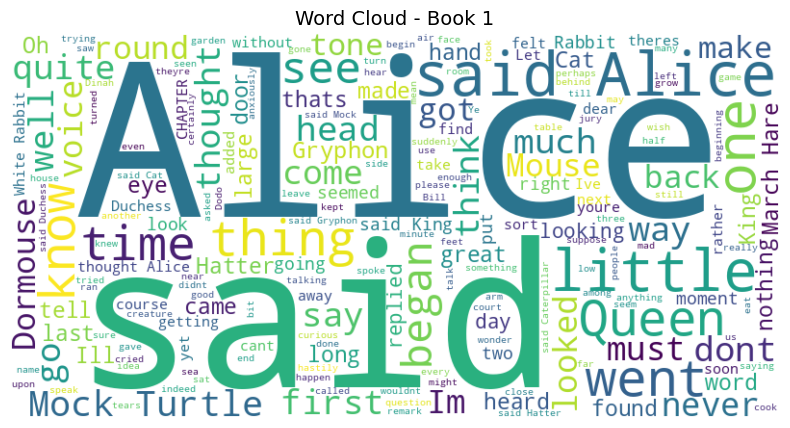

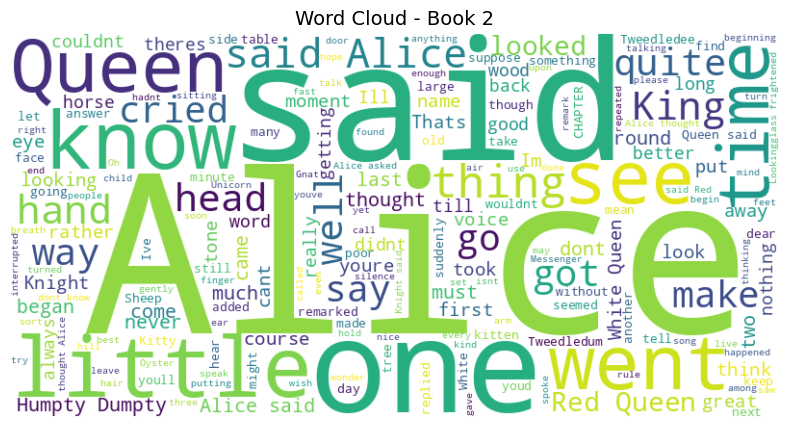

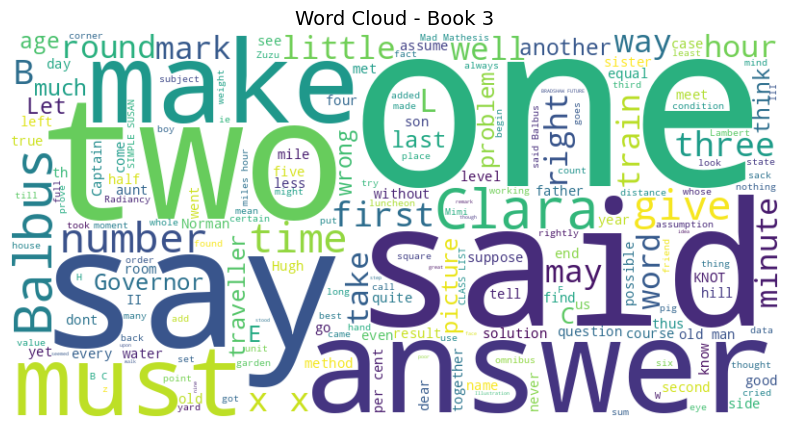

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Function to generate and display a word cloud
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(text))

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")  # Hide axes
    plt.title(title, fontsize=14)
    plt.show()

# Generate word clouds for each book
for i, tokens in enumerate(tokenized_books_no_stopwords):
    generate_wordcloud(tokens, f"Word Cloud - Book {i+1}")



Top 5 Most Frequent Words in All Books (BoW):
Word: say, Frequency: 1295
Word: alice, Frequency: 830
Word: not, Frequency: 606
Word: one, Frequency: 453
Word: go, Frequency: 418


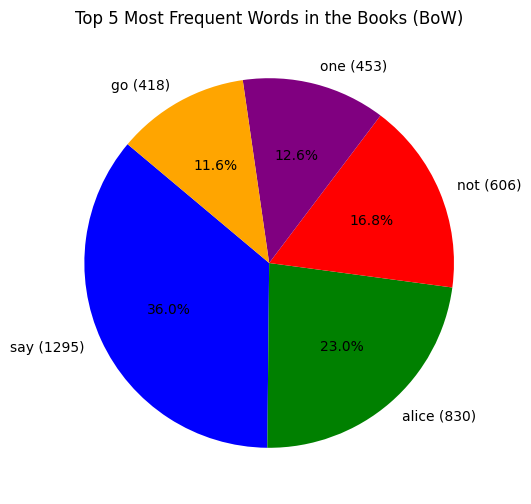

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt

# Convert lists of tokens into a single string per book
lemmatized_books = [" ".join(tokens) for tokens in lemmatized_books]

# Initialize CountVectorizer (BoW Model)
vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform(lemmatized_books)

# Get word counts
word_counts = np.asarray(bow_matrix.sum(axis=0)).flatten()
word_list = vectorizer.get_feature_names_out()

# Create a dictionary of words and their frequencies
word_freq = dict(zip(word_list, word_counts))

# Sort by frequency (Top 5 words)
top_5_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:5]

# Print the BoW results
print("\nTop 5 Most Frequent Words in All Books (BoW):")
for word, freq in top_5_words:
    print(f"Word: {word}, Frequency: {freq}")

# Extract words and their frequencies
words, frequencies = zip(*top_5_words)

# Plot Pie Chart
plt.figure(figsize=(8, 6))
plt.pie(frequencies, labels=[f"{w} ({f})" for w, f in zip(words, frequencies)], autopct="%1.1f%%", startangle=140, colors=['blue', 'green', 'red', 'purple', 'orange'])
plt.title("Top 5 Most Frequent Words in the Books (BoW)")
plt.show()


"say" is the most frequent word, which likely reflects the narrative style of the books, where many dialogues or actions are described by characters talking or stating things.

"alice" appears frequently, which is expected, as the books are focused on the adventures of Alice in Alice's Adventures in Wonderland.

"not" is a common stop word that is still frequent in the dataset, indicating it appears in numerous negations or conversations.

"one" is a numeral, which is also expected to appear often in any narrative text.

"go" is another action verb, possibly reflecting movement or events in the story.

# Solving the frequency problem using TF-IDF

When we create a BoW out from some text, all the words are treated equaly as importants. Like “Alice” or “say” in a fantasy book about Alice. We expected those words to be repeated all over the book, making them not so informative to us.

The solution for this problem would be to consider the frequency relative to the corpus. In this case, if there is a word in a document that doesn’t appears much in the other documents, it is likely meaningful and should be considered more important. And the same way in the oposite: A word that is repeated a lot in all the documents will be considered less important.

That’s the perfect situation to use TF-IDF (Term Frequency-Inverse Document Frequency)

Create another BoW, now using TF-IDF as vectorizer.

hint: You need to pass min_df=1, max_df=2 as arguments of the TfidfVectorizer(), because we are using a small dataset.
Create again the pie plots with the new 5 most relevant words from each document.



Top 5 Most Relevant Words in All Books (TF-IDF):
Word: humpty, TF-IDF Score: 0.3585716545061844
Word: dumpty, TF-IDF Score: 0.35216858924714534
Word: gryphon, TF-IDF Score: 0.3472676843230043
Word: balbus, TF-IDF Score: 0.3054550325066739
Word: knight, TF-IDF Score: 0.3000413495676773


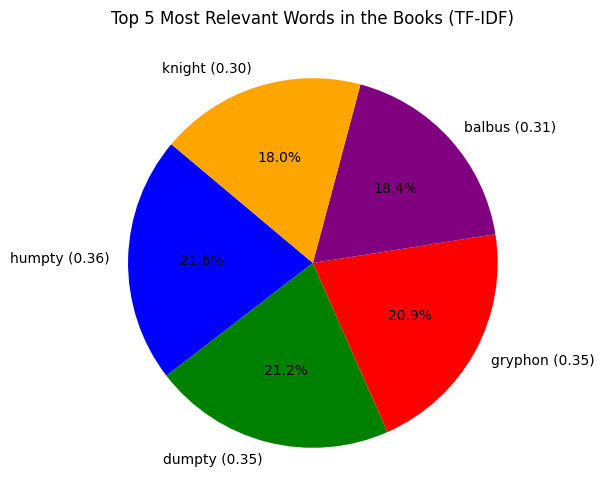

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import matplotlib.pyplot as plt


# Initialize TfidfVectorizer (TF-IDF Model)
vectorizer = TfidfVectorizer(min_df=1, max_df=2)
tfidf_matrix = vectorizer.fit_transform(lemmatized_books)

# Get TF-IDF scores
tfidf_scores = np.asarray(tfidf_matrix.sum(axis=0)).flatten()
word_list = vectorizer.get_feature_names_out()

# Create a dictionary of words and their TF-IDF scores
word_tfidf = dict(zip(word_list, tfidf_scores))

# Sort by TF-IDF score (Top 5 words for each document)
top_5_tfidf_words = sorted(word_tfidf.items(), key=lambda x: x[1], reverse=True)[:5]

# Print the TF-IDF results
print("\nTop 5 Most Relevant Words in All Books (TF-IDF):")
for word, tfidf in top_5_tfidf_words:
    print(f"Word: {word}, TF-IDF Score: {tfidf}")

# Extract words and their TF-IDF scores
words, scores = zip(*top_5_tfidf_words)

# Plot Pie Chart for TF-IDF
plt.figure(figsize=(8, 6))
plt.pie(scores, labels=[f"{w} ({s:.2f})" for w, s in zip(words, scores)], autopct="%1.1f%%", startangle=140, colors=['blue', 'green', 'red', 'purple', 'orange'])
plt.title("Top 5 Most Relevant Words in the Books (TF-IDF)")
plt.show()


"Humpty" and "dumpty" have the highest TF-IDF scores, which makes sense since these terms are central to "Humpty Dumpty," a well-known character in the Alice in Wonderland story. Their relatively high TF-IDF values suggest that these words are quite unique and important within the corpus.

"Gryphon" is another character in Alice in Wonderland, which aligns with the context of the book.

"Balbus" and "knight" also reflect character names or important roles within the story.

Insights:
The TF-IDF values are helping to highlight meaningful words in the context of the corpus, particularly those that are specific to the story and not commonly used across different documents (e.g., common words like "say" or "alice").

These words are much more informative than frequent words like "say" or "alice," which are overrepresented in the text and would have lower TF-IDF scores.